## Non-Voters | Dash App

Let's build a Dash app using Heroku that explores how the analysts at FiveThirtyEight weight different groups of non-voters, and allows a user to view results of a survey

#### Import Libraries & Setup Engines

In [89]:
from datetime import datetime as dt 
import numpy as np
import pandas as pd
import sqlalchemy as sql
import plotly.express as px
from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output

pd.set_option('display.max_columns', 200) 

sql_engine = sql.create_engine('mssql+pyodbc://@localhost')

#### Get Data

In [4]:
table = 'NON_VOTERS'
query = f"SELECT * FROM {table}"
df = pd.read_sql_query(query, sql_engine, index_col='RespId')
df.head()

,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q14,Q15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_10,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27_1,Q27_2,Q27_3,Q27_4,Q27_5,Q27_6,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
RespId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
470001,0.7516,1,1,1,2,4,1,4,2,2,4,2,1,1,4,4,3,2,2,1,2,2,2,2,1,2,1,3,4,2,1,1,1,1,2,4,2,2,4,4,2,2,2,2,2,2,2,2,2,2,5,1,1,1,1,1,3,2,2,2,2,2,2,2,2,2,2,-1,-1,1,1,1,1,1,-1,-1,-1,1,1,NaN,2,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
470002,1.0267,1,1,2,2,3,1,1,2,1,1,3,3,3,4,3,3,2,2,2,2,3,3,1,1,2,2,2,3,2,2,2,2,3,2,2,1,1,3,4,2,2,2,2,2,2,1,2,2,2,1,1,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,NaN,1,3,3,1,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
470003,1.0844,1,1,1,2,2,1,1,2,1,4,3,2,2,3,3,2,2,2,2,3,3,2,3,1,1,1,3,2,1,1,2,2,2,2,1,1,2,4,4,2,2,1,2,2,2,1,2,1,2,5,2,1,1,3,1,1,2,2,2,2,2,2,1,2,2,2,-1,1,-1,1,-1,-1,-1,1,1,-1,1,1,NaN,2,1,2,1,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
470007,0.6817,1,1,1,1,3,1,1,1,1,1,2,1,1,4,4,2,1,1,2,2,2,2,2,1,3,1,3,2,2,2,2,2,2,2,2,1,2,4,4,2,2,2,2,1,2,2,2,1,2,5,1,4,1,1,1,1,2,2,2,2,2,2,2,2,2,2,-1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,NaN,2,1,2,1,1,1,1,1,1,1,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
480008,0.9910,1,1,1,-1,1,1,1,1,1,1,1,4,-1,1,1,2,4,1,1,1,1,1,1,1,2,2,1,3,2,3,3,3,4,2,2,1,4,3,4,2,2,2,2,2,2,1,2,2,2,1,5,1,2,2,4,4,2,2,2,2,2,2,2,2,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,NaN,1,3,1,1,1,1,1,1,1,1,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5836 entries, 470001 to 477666
Columns: 118 entries, weight to voter_category
dtypes: float64(23), int64(90), object(5)
memory usage: 5.3+ MB


#### Let's make a simple histogram to visualize age & voting propensity

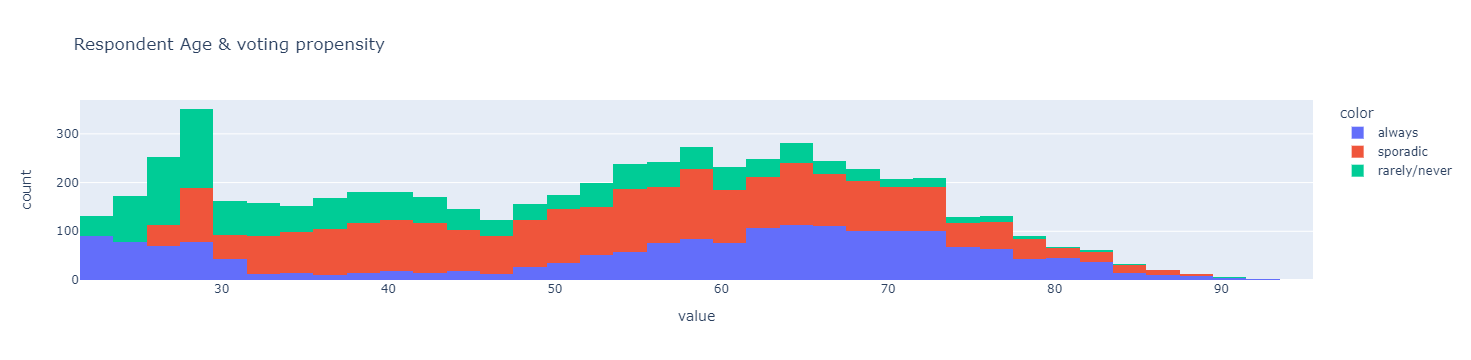

In [94]:
hist = px.histogram(df['ppage'], color=df['voter_category'], title='Respondent Age & voting propensity')
hist.show()

#### We can put two plots next to eachother using Plotly's make_subplots
Let's use this to look at how different ages and genders are weighted

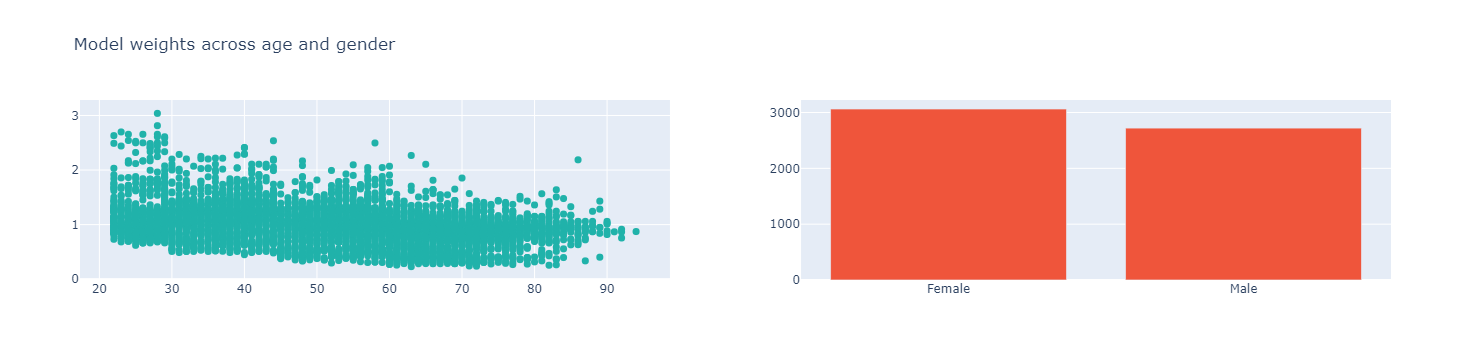

In [96]:
sub = make_subplots(rows=1, cols=2) 

sub.add_scatter(x=df['ppage'], y=df['weight'], mode='markers', row=1, col=1, showlegend=False, marker=dict(size=7, color='LightSeaGreen'))

gender = df[['weight', 'gender']].groupby('gender', as_index=False).sum()
sub.add_bar(x=gender['gender'], y=gender['weight'], row=1, col=2, showlegend=False)

sub.layout.title.text = "Model weights across age and gender"

sub.show()

#### We can break out the demographics even further using Scatter's facet property

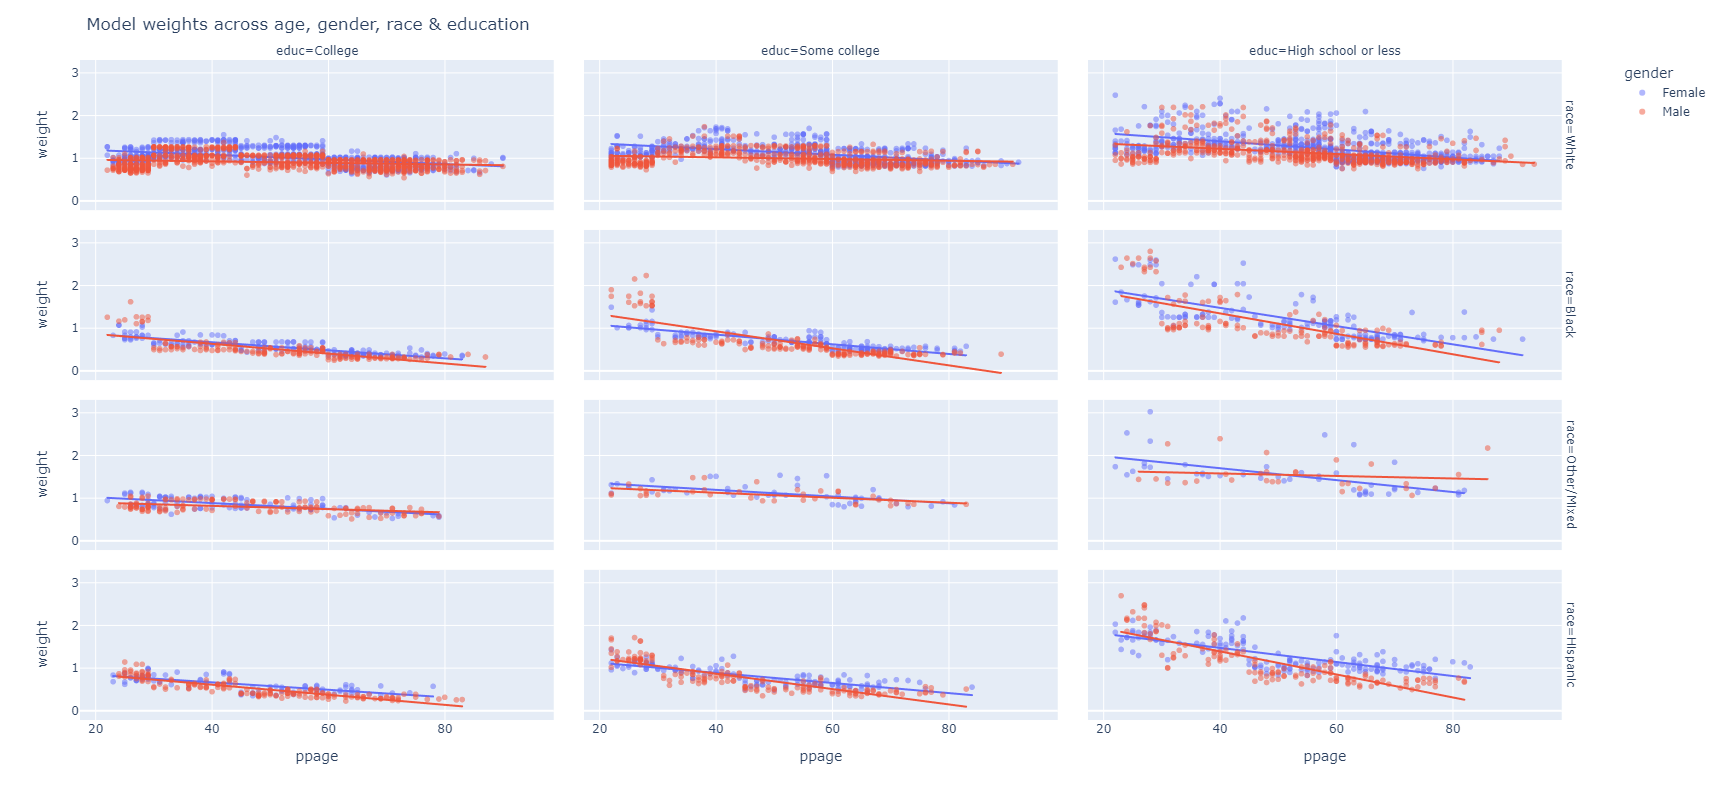

In [82]:
age_weight = px.scatter(df, x='ppage', y='weight', opacity=.5, color='gender', facet_col='educ', facet_row='race', trendline='ols', height=800)
age_weight.layout.title.text = "Model weights across age, gender, race & education" 
age_weight.show()

#### Develop a Graph that we can use to iterate through the questions
See the survery codebook PDF for the actual questions

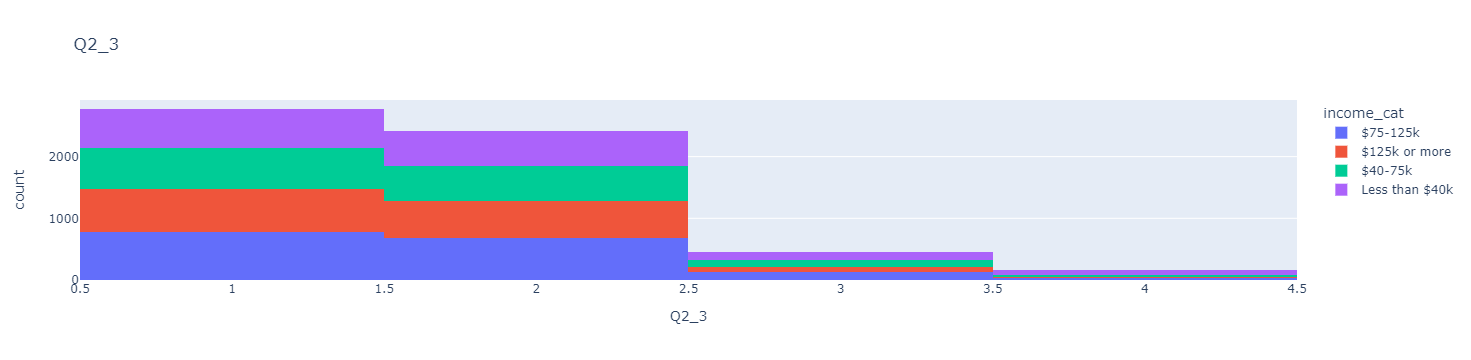

In [119]:
qi = 'Q2_3'
color_cols = ['educ', 'race', 'gender', 'income_cat', 'voter_category']

dfi = df[df[qi].isin([1, 2, 3, 4])]

px.histogram(dfi, x=dfi[qi], color=color_cols[3], title=qi)

Value Reference:  1 = Strongly,  2 = Somewhat,  3 = Not so much,  4 = Not at all

#### Build Dash App

In [146]:
app = JupyterDash(__name__)
server = app.server

color_cols = ['educ', 'race', 'gender', 'income_cat', 'voter_category']

app.layout = html.Div(children=[
    
    html.H1('Exploring Non-Voters in the US'),
    html.H4('Dashboard by Luke Simmons  |  Data courtesy of FiveThirtyEight'),
    html.Br(), 
    dcc.Graph(id='hist-graph', figure=hist), 
    html.Br(), 
    dcc.Graph(id='subplot-graph', figure=sub), 
    html.Br(), 
    dcc.Graph(id='scatter-graph', figure=age_weight), 
    html.Br(), 
    html.H2('View Survey Results'), 
    html.P('Select a question and segmentation'), 
    dcc.Dropdown(df.loc[:,'Q2_1':'Q33'].columns, 'Q2_1', id='q_dropdown'), 
    dcc.Dropdown(color_cols, 'educ', id='color_dropdown'), 
    dcc.Graph(id='graph_w_dropdown')
    
])

@app.callback(
    Output('graph_w_dropdown', 'figure'), 
    Input('q_dropdown', 'value'), 
    Input('color_dropdown', 'value'))
    
def build_figure(question, color_col): 
    dfi = df[df[question].isin([1, 2, 3, 4])]
    fig = px.histogram(dfi, x=dfi[question], color=color_col)
    fig.update_xaxes(tickvals=[1, 2, 3, 4])
    fig.update_xaxes(ticktext=['Strongly', 'Somewhat', 'Not so much', 'Not at all'])
    return fig

if __name__ == '__main__':
    app.run_server(mode='jupyterlab', use_reloader=False)

***